# Step0: defineProb_statement

**Objective**

To develop a machine learning model using a Mulit-layer perceptron (MLP or Multi-Variant) RNN (Recurrent Neural Network) to forecast the closing price of TCS stock for the next 5 days when dataset ended, also plot the trained of close over the whole data based on historical stock price data.








**Step-Taken**


write your intution in own word here ....

In [44]:
# Step 1: Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # for plotting


from sklearn.preprocessing import MinMaxScaler   # for scalling
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score # for evaluation

from sklearn.model_selection import train_test_split  # while data point splitting



# using this we create mode (Simple RNN)
from tensorflow.keras.models import Sequential
# layer used is dense
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout

# Step1: Load_Data

In [45]:
# Load the dataset

file_path = '/content/cleanData_TCS_25Aug2004_5sep2024_NSE.csv'
data = pd.read_csv(file_path)

## s(i) Trail_01_deleteLast_5rows

In [46]:
# Import necessary libraries
import pandas as pd

# Load the dataset
file_path = '/content/cleanData_TCS_25Aug2004_5sep2024_NSE.csv'

# Display the original dataset
print("Original dataset:")
print(data)

# Remove the last 5 rows
data = data[:-5]

# Display the updated dataset
print("\nUpdated dataset (last 5 rows removed):")
print(data)


Original dataset:
            Date      Open      High       Low     Close       Volume
0     2004-08-25  1,198.70  1,198.70       979    987.95  1,71,16,372
1     2004-08-26       992       997     975.3       979    50,55,400
2     2004-08-27     982.4     982.4    958.55    962.65    38,30,750
3     2004-08-30     969.9       990       965    986.75    30,58,151
4     2004-08-31     986.5       990       976     988.1    26,49,332
...          ...       ...       ...       ...       ...          ...
4962  2024-08-30  4,500.00  4,592.25  4,487.80  4,553.75    36,37,222
4963  2024-09-02  4,576.00  4,588.00  4,512.00  4,521.05    12,16,500
4964  2024-09-03  4,521.05  4,555.90  4,495.90  4,512.35    17,17,263
4965  2024-09-04  4,476.95  4,487.00  4,436.70  4,479.25    12,65,505
4966  2024-09-05  4,481.00  4,499.00  4,454.15  4,475.95    16,88,793

[4967 rows x 6 columns]

Updated dataset (last 5 rows removed):
            Date      Open      High       Low     Close       Volume
0     2

# Step2: PreProcessing

## s(i) assign_Dep_Indep_Variable

In [47]:
# Extract the last date in the dataset
last_date = pd.to_datetime(data['Date'].iloc[-1])

# Generate the next 5 dates
next_5_dates = [last_date + pd.Timedelta(days=i) for i in range(1, 6)]


In [48]:
# Independent variables (X-axis): 'Open', 'Low', 'High', 'Adj Close', 'Volume'
# Dependent variable (Y-axis): 'Close'


X = data[['Open', 'Low', 'High', 'Volume']].values

Y = data['Close'].values

## s(ii) Normalize_MinMax_Scale

In [49]:
# Scale the data
scaler = MinMaxScaler()

# Select the 'Close' column and convert it to numeric, removing commas
Close_prices = pd.to_numeric(data['Close'].str.replace(',', ''), errors='coerce').values

# Reshape the data to a 2D array
Close_prices_scaled = scaler.fit_transform(Close_prices.reshape(-1, 1))


In [50]:
# Independent variables (X-axis): 'Open', 'Low', 'High', 'Adj Close', 'Volume'
# Dependent variable (Y-axis): 'Close'

# Convert columns to numeric, removing commas
for col in ['Open', 'Low', 'High', 'Volume', 'Close']:
    data[col] = pd.to_numeric(data[col].str.replace(',', ''), errors='coerce')

X = data[['Open', 'Low', 'High', 'Volume']].values
Y = data['Close'].values

# Scale the data
scaler_X = MinMaxScaler()
scaler_Y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
Y_scaled = scaler_Y.fit_transform(Y.reshape(-1, 1))

Why 60?

Ans: In summary, look_back = 60 means you are using the previous 60 time steps of data to predict the next time step in your time series prediction task. Adjusting this parameter might affect how your model learns from historical data and predicts future values.



*   The choice of look_back = 60 in our example suggests that we are using 60 previous time steps (or data points) to predict the next data point in our time series.




In [51]:
# Create sequences for RNN

def create_sequences(X, Y, time_steps=1):
    Xs, Ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps)])
        Ys.append(Y[i + time_steps])
    return np.array(Xs), np.array(Ys)



time_steps = 60  # Use the past 60 days to predict the next day
X_seq, Y_seq = create_sequences(X_scaled, Y_scaled, time_steps)

## s(iii) split_TrainTest

In [52]:
# Split the data into training and test sets


train_size = int(len(X) * 0.75)  # 75% for training, 25% for testing


X_train, X_test = X[:train_size], X[train_size:]
Y_train, Y_test = Y[:train_size], Y[train_size:]

# Step3: Build_simpleRNN_Model

In [53]:
# Define the RNN model


model = Sequential()
model.add(SimpleRNN(units=50, return_sequences=True, input_shape=(X_seq.shape[1], X_seq.shape[2])))
model.add(Dropout(0.2))
model.add(SimpleRNN(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [54]:
# model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_2 (SimpleRNN)             │ (None, 60, 50)              │           2,750 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_3 (SimpleRNN)             │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,851 (30.67 KB)

 Trainable params: 7,851 (30.67 KB)

 Non-trainable params: 0 (0.00 B)

## s(i) Model_Summary_Visualize

In [55]:
# import req library

!sudo apt-get install graphviz

!pip install pydot

from tensorflow.keras.utils import plot_model


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


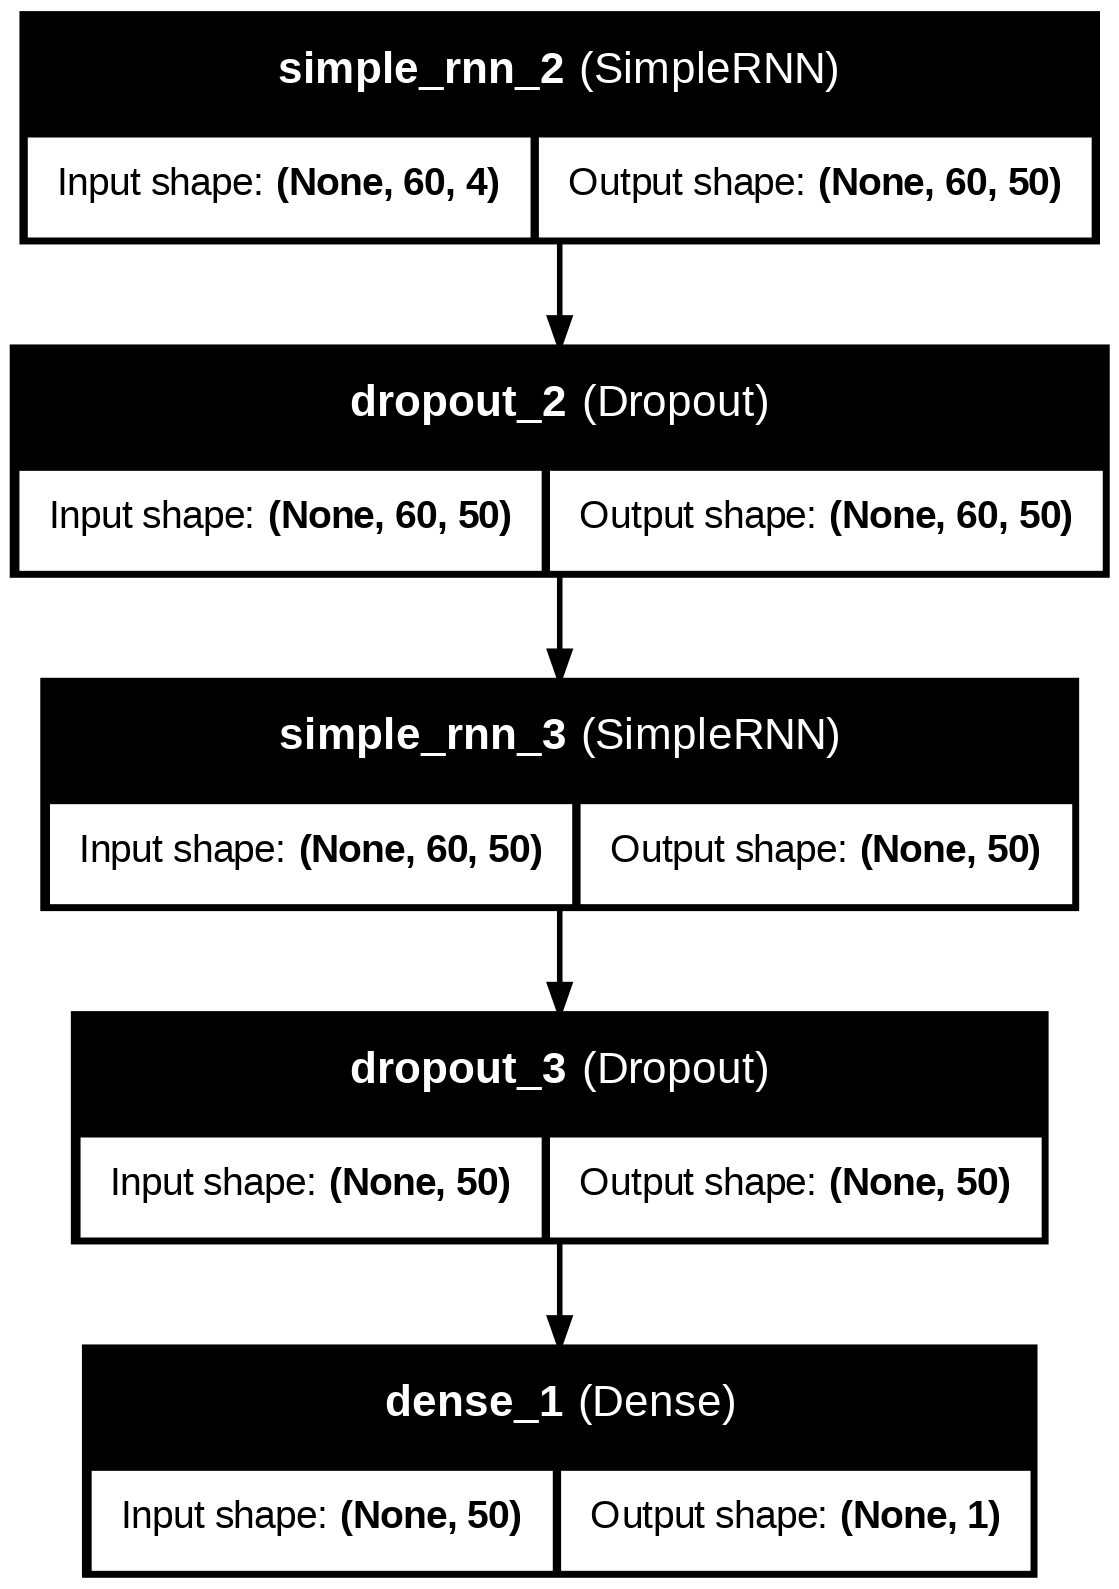

In [56]:
from tensorflow.keras.utils import plot_model

# Generate the plot and save it to a file
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

# Display the plot inline (if using a Jupyter notebook)
from IPython.display import Image
Image(filename='model_architecture.png')


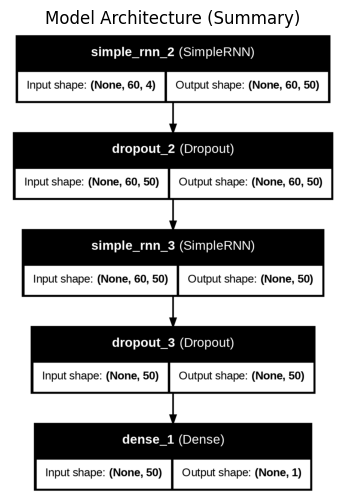

In [57]:
## If you are not using a Jupyter notebook, you can display the plot using matplotlib



img = plt.imread('model_architecture.png')
plt.figure(figsize=(12, 6))
plt.imshow(img)
plt.axis('off')
plt.title('Model Architecture (Summary)')
plt.show()

## s(ii) Compile_Train

In [58]:
# Train the model
history = model.fit(X_seq, Y_seq, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.2051 - val_loss: 0.0113
Epoch 2/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0162 - val_loss: 0.0038
Epoch 3/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0090 - val_loss: 0.0061
Epoch 4/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0051 - val_loss: 0.0019
Epoch 5/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0044 - val_loss: 0.0018
Epoch 6/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - loss: 0.0030 - val_loss: 7.4246e-04
Epoch 7/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0028 - val_loss: 0.0021
Epoch 8/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0024 - val_loss: 8.2716e-04
Epoch 9/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0022 - val_loss: 0.0030
Epoch 10/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0019 - val_loss: 7.4599e-04


# Step4: Predication

In [59]:
# Forecasting function

def forecast(model, X, n_steps):
    forecasted = []
    current_step = X[-1]

    for _ in range(n_steps):
        current_step = current_step.reshape(1, time_steps, X.shape[2])
        predicted = model.predict(current_step)
        forecasted.append(predicted[0, 0])
        current_step = np.roll(current_step, -1, axis=1)
        current_step[0, -1, 0] = predicted

    return scaler_Y.inverse_transform(np.array(forecasted).reshape(-1, 1))

In [60]:
# Forecast the next 5 days
forecasted_prices = forecast(model, X_seq, 5)

# Create a DataFrame with the forecasted prices and dates
forecasted_df = pd.DataFrame({
    'Date': next_5_dates,
    'Forecasted_Close': forecasted_prices.flatten()
})

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


<ipython-input-59-f1b741060309>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_step[0, -1, 0] = predicted


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [61]:
# Print the next 5 days' closing prices with  dates


for date, price in zip(next_5_dates, forecasted_prices):
    print(f"Date: {date.strftime('%y-%m-%d')}, Forecasted Close Price: {price[0]}")

Date: 24-08-30, Forecasted Close Price: 4246.44287109375
Date: 24-08-31, Forecasted Close Price: 3823.90234375
Date: 24-09-01, Forecasted Close Price: 3623.5615234375
Date: 24-09-02, Forecasted Close Price: 3784.6826171875
Date: 24-09-03, Forecasted Close Price: 3717.161376953125


## s(i) Next_5days


In [62]:
# only next 5days closing prices
print(forecasted_df)

        Date  Forecasted_Close
0 2024-08-30       4246.442871
1 2024-08-31       3823.902344
2 2024-09-01       3623.561523
3 2024-09-02       3784.682617
4 2024-09-03       3717.161377


## s(ii) plot_only5days

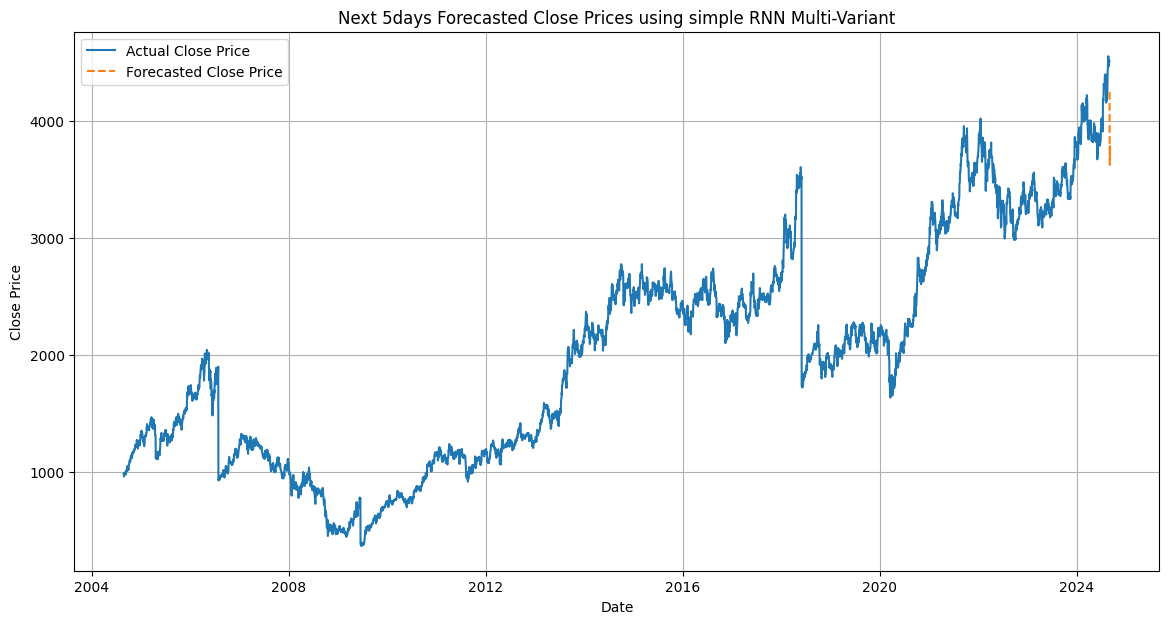

In [63]:
# Plot the actual and forecasted next 5days closing prices

plt.figure(figsize=(14, 7))

plt.plot(pd.to_datetime(data['Date']), data['Close'], label='Actual Close Price')

# plt.plot(pd.to_datetime(data['Date'], format='%y-%m-%d'), data['Close'], label='Actual Close Price')  #for NSE data Paper
plt.plot(forecasted_df['Date'], forecasted_df['Forecasted_Close'], label='Forecasted Close Price', linestyle='--')


plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Next 5days Forecasted Close Prices using simple RNN Multi-Variant')
plt.legend()
plt.grid(True)
plt.show()

## s(iv) see_accuracy_RMSE

In [64]:
from sklearn.metrics import mean_squared_error, r2_score

predicted_prices = forecasted_df['Forecasted_Close'].values

# Extract actual prices from your 'data' DataFrame (adjust column name if needed)
actual_prices = data['Close'][:len(predicted_prices)]

# Now calculate the metrics
mse = mean_squared_error(actual_prices, predicted_prices)
r2 = r2_score(actual_prices, predicted_prices)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 8213579.640300898
R-squared: -86926.77704012247


In [65]:
 # Import the necessary module for regression metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming 'actual_prices' and 'predicted_prices' from previous calculations are your true and predicted values
y_test = actual_prices
y_pred = predicted_prices

# Calculate appropriate metrics for regression problems
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Root Mean Squared Error
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the calculated metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 8213579.640300898
Root Mean Squared Error (RMSE): 2865.934339844669
Mean Absolute Error (MAE): 2858.2601464843747
R-squared (R2): -86926.77704012247


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
